In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm

In [3]:
def DailyTraffic(TData, Date):
    df1 = TData[TData['DATE'] == Date]
    
    df2 = df1.drop(['DIST','DIR', 'DATE'], axis=1)
    df3 = df2.sort_index()
    df4 = df3[~df3.index.duplicated()]
    df5 = df4.T
    
    Hours = pd.Series(list(range(1,25)),index=df5.index)
    df5['Hour'] = Hours
    return df5
#End of DailyTraffic

# Function to add shifted traffic data to the dataset    
def addShiftTraffic(DataSet, OneSiteTraffic, periods = 4):
    for i in range(1, periods+1):
        ShiftedTraffic = OneSiteTraffic.shift(periods=i)
        ColumnSuffix = '_' +str(i) + 'HrBf'
        DataSet = DataSet.join(ShiftedTraffic, rsuffix=ColumnSuffix)
        
    return DataSet

# Read in data from the CSV files    
#Folder = "C:/Users/faculty/Desktop/Temp/Python/CATM/Traffic Analysis/"
#Folder = "D:/Spring_2020/UTC_2020/Evacuation analysis/Hurricane Florence CSV files/"
Folder = "C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/"

Counties = pd.read_csv(Folder + "AdjacentCounty.csv", index_col="County")
Counties['Sr.No'] = Counties.index

SensorSite = pd.read_csv(Folder + "Consolidate Data.csv", index_col="SITE")

D1 = pd.read_csv(Folder + "D1.csv",index_col='SITE')
D2 = pd.read_csv(Folder + "D2.csv",index_col='SITE')
D3 = pd.read_csv(Folder + "D3.csv",index_col='SITE')
D4 = pd.read_csv(Folder + "D4.csv",index_col='SITE')
D5 = pd.read_csv(Folder + "D5.csv",index_col='SITE')
D6 = pd.read_csv(Folder + "D6.csv",index_col='SITE')

# Merge the traffic data from all files
# Then seperate them into four datasets by directions
RawData = pd.concat([D1,D2,D3,D4,D5,D6], sort=False)
EBTraffic = RawData[RawData['DIR'] == 'EB']
WBTraffic = RawData[RawData['DIR'] == 'WB']
NBTraffic = RawData[RawData['DIR'] == 'NB']
SBTraffic = RawData[RawData['DIR'] == 'SB']

# Filter the evacuation data and re-organize the dataset
Dates = ['9/5/2018', '9/6/2018', '9/7/2018', '9/8/2018', '9/9/2018']

WBframes = [0] * len(Dates)
NBframes = [0] * len(Dates)
#EBframes = [0] * len(Dates)
#SBframes = [0] * len(Dates)
for i in range(len(Dates)):
    WBframes[i] = DailyTraffic(WBTraffic, Dates[i])
    NBframes[i] = DailyTraffic(NBTraffic, Dates[i])
    #EBframes[i] = DailyTraffic(EBTraffic, Dates[i])
    #SBframes[i] = DailyTraffic(SBTraffic, Dates[i])
        
WBTData = pd.concat(WBframes, keys=Dates, sort=False)
NBTData = pd.concat(NBframes, keys=Dates, sort=False)
#EBTData = pd.concat(EBframes, keys=Dates, sort=False)
#SBTData = pd.concat(SBframes, keys=Dates, sort=False)

#EvacuationTraffic = WBTData.join(NBTData, how='outer',rsuffix='_NB')
EvacuationTraffic = WBTData.join(NBTData, how='outer',rsuffix='_NB')

# Prepare the dataset for the prediction modeling
# PredInput is the dataset for the prediction modeling
AvailableSensors = list(EvacuationTraffic.columns)
Sensor = "R9103"

PredInput = EvacuationTraffic.loc[:,[Sensor,'Hour']]

SiteTraffic = EvacuationTraffic[Sensor]
PredInput = addShiftTraffic(PredInput, SiteTraffic)

SensorCounty = SensorSite.loc[Sensor,'County']

for adjCounty in Counties.loc[SensorCounty]:
    adjSensors = SensorSite[SensorSite['County'] == adjCounty].index

    for adjSensor in adjSensors:
        if adjSensor == Sensor:
            continue
        
        print(adjSensor)
        available = AvailableSensors.count(adjSensor)        
        if available == 0:
            print('Sensor ' + adjSensor + ' is misisng!')
        elif available == 1:
            adjTraffic = EvacuationTraffic[adjSensor]
            PredInput = PredInput.join(adjTraffic)
            PredInput = addShiftTraffic(PredInput, adjTraffic)
            PredInput = PredInput.drop([adjSensor], axis=1)


R9101
R9102
R9104
R9106
R9107
R9108
Sensor R9108 is misisng!
R9111
R9112
R9113
R9114
Sensor R9114 is misisng!
R5001
A5001D4
A4201
A6301
A6302
R6301
R3103


In [3]:

#dataframe = pd.DataFrame(EvacuationTraffic)

#Sensor_Df1 = dataframe.iloc[3:,]
    
#Sensor_Data = Sensor_Df1.dropna(axis=1)

#AllSensors = Sensor_Data.drop(['Hour_NB', 'Hour'], axis=1)
#Sensor_list =AllSensors.columns
#list =Sensor_list.values.tolist()
#AllSensorslistDataframe = pd.DataFrame(list)

#AllSensorslistDataframe.to_excel("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/" +"list"+ Sensor + ".xlsx")


In [4]:

Df1 = PredInput.iloc[3:,]
Df1
#DfPredInput.fillna(axis= 1, method ='ffill')

A2501  Hour  A2501_1HrBf  A2501_2HrBf  A2501_3HrBf  \
9/5/2018 HR 4     110     4         98.0        120.0        183.0   
         HR 5     312     5        110.0         98.0        120.0   
         HR 6    1150     6        312.0        110.0         98.0   
         HR 7    1497     7       1150.0        312.0        110.0   
         HR 8    2126     8       1497.0       1150.0        312.0   
...               ...   ...          ...          ...          ...   
9/9/2018 HR 20    894    20       1045.0       1058.0       1144.0   
         HR 21    765    21        894.0       1045.0       1058.0   
         HR 22    575    22        765.0        894.0       1045.0   
         HR 23    358    23        575.0        765.0        894.0   
         HR 24    277    24        358.0        575.0        765.0   

                A2501_4HrBf  A4201_1HrBf  A4201_2HrBf  A4201_3HrBf  \
9/5/2018 HR 4           NaN         26.0         28.0         30.0   
         HR 5         183.0         26.0         26.0         28.0   
         HR 6         120.0         65.0         26.0         26.0   
         HR 7          98.0        236.0         65.0         26.0   
         HR 8         110.0        517.0        236.0         65.0   
...                     ...          ...          ...          ...   
9/9/2018 HR 20       1236.0        472.0        513.0        505.0   
         HR 21       1144.0        443.0        472.0        513.0   
         HR 22       1058.0        306.0        443.0        472.0   
         HR 23       1045.0        237.0        306.0        443.0   
         HR 24        894.0        129.0        237.0        306.0   

                A4201_4HrBf  R7701_1HrBf  R7701_2HrBf  R7701_3HrBf  \
9/5/2018 HR 4           NaN         40.0         31.0         46.0   
         HR 5          30.0         53.0         40.0         31.0   
         HR 6          28.0         62.0         53.0         40.0   
         HR 7          26.0        138.0         62.0         53.0   
         HR 8          26.0        280.0        138.0         62.0   
...                     ...          ...          ...          ...   
9/9/2018 HR 20        579.0          NaN          NaN          NaN   
         HR 21        505.0          NaN          NaN          NaN   
         HR 22        513.0          NaN          NaN          NaN   
         HR 23        472.0          NaN          NaN          NaN   
         HR 24        443.0          NaN          NaN          NaN   

                R7701_4HrBf  
9/5/2018 HR 4           NaN  
         HR 5          46.0  
         HR 6          31.0  
         HR 7          40.0  
         HR 8          53.0  
...                     ...  
9/9/2018 HR 20          NaN  
         HR 21          NaN  
         HR 22          NaN  
         HR 23          NaN  
         HR 24          NaN  

[117 rows x 14 columns]

In [5]:
Data = Df1.dropna(axis=1)
Data

A2501  Hour  A2501_1HrBf  A2501_2HrBf  A2501_3HrBf  \
9/5/2018 HR 4     110     4         98.0        120.0        183.0   
         HR 5     312     5        110.0         98.0        120.0   
         HR 6    1150     6        312.0        110.0         98.0   
         HR 7    1497     7       1150.0        312.0        110.0   
         HR 8    2126     8       1497.0       1150.0        312.0   
...               ...   ...          ...          ...          ...   
9/9/2018 HR 20    894    20       1045.0       1058.0       1144.0   
         HR 21    765    21        894.0       1045.0       1058.0   
         HR 22    575    22        765.0        894.0       1045.0   
         HR 23    358    23        575.0        765.0        894.0   
         HR 24    277    24        358.0        575.0        765.0   

                A4201_1HrBf  A4201_2HrBf  A4201_3HrBf  
9/5/2018 HR 4          26.0         28.0         30.0  
         HR 5          26.0         26.0         28.0  
         HR 6          65.0         26.0         26.0  
         HR 7         236.0         65.0         26.0  
         HR 8         517.0        236.0         65.0  
...                     ...          ...          ...  
9/9/2018 HR 20        472.0        513.0        505.0  
         HR 21        443.0        472.0        513.0  
         HR 22        306.0        443.0        472.0  
         HR 23        237.0        306.0        443.0  
         HR 24        129.0        237.0        306.0  

[117 rows x 8 columns]

In [6]:
#X and Y arrays
#cat_feat = ['Hour']
#Final_Data = pd.get_dummies(Data, columns= cat_feat, drop_first=True)
X = Data.drop(['R9103','Hour'] ,axis=1)
y = Data['R9103']
y

9/5/2018  HR 4      110
          HR 5      312
          HR 6     1150
          HR 7     1497
          HR 8     2126
                   ... 
9/9/2018  HR 20     894
          HR 21     765
          HR 22     575
          HR 23     358
          HR 24     277
Name: A2501, Length: 117, dtype: int64

In [7]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
#model.pvalues

In [8]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
#outF = open("myOutFile.txt", "w")
#for data in selected_features_BE:
  #print(outF, data)
#outF.close()
print(selected_features_BE)

['A2501_1HrBf', 'A4201_1HrBf', 'A4201_2HrBf']


In [42]:
X.drop([('9/5/2018', 'HR 14'),('9/5/2018', 'HR 15'),('9/5/2018', 'HR 16'),('9/5/2018', 'HR 17'),('9/5/2018', 'HR 8'),
        ('9/5/2018', 'HR 18'),('9/6/2018', 'HR 8'),('9/6/2018', 'HR 13'),('9/7/2018', 'HR 8'),('9/7/2018', 'HR 18'),
        ('9/8/2018', 'HR 10'),('9/6/2018', 'HR 12'), ('9/8/2018', 'HR 16'), ('9/8/2018', 'HR 16'),('9/8/2018', 'HR 12'),
        ('9/6/2018', 'HR 9'),('9/6/2018', 'HR 14'),('9/7/2018', 'HR 10'),('9/8/2018', 'HR 11'),('9/9/2018', 'HR 13'),
        ('9/5/2018', 'HR 11'),('9/8/2018', 'HR 13'),('9/8/2018', 'HR 18'),('9/7/2018', 'HR 16'),('9/9/2018', 'HR 11'),
        ('9/9/2018', 'HR 15'),('9/5/2018', 'HR 7'),('9/5/2018', 'HR 13'),('9/8/2018', 'HR 9'),('9/8/2018', 'HR 21'),
       ('9/7/2018', 'HR 17')]
       ,axis=0, inplace=True)
X

A9001_1HrBf  A9001_2HrBf  A9001_3HrBf
9/5/2018 HR 4           1.0          2.0          1.0
         HR 5           1.0          1.0          2.0
         HR 6           4.0          1.0          1.0
         HR 9          22.0         13.0          5.0
         HR 10         17.0         22.0         13.0
...                     ...          ...          ...
9/9/2018 HR 20         12.0         14.0         18.0
         HR 21         16.0         12.0         14.0
         HR 22         13.0         16.0         12.0
         HR 23          4.0         13.0         16.0
         HR 24          1.0          4.0         13.0

[87 rows x 3 columns]

In [43]:
y.drop([('9/5/2018', 'HR 14'),('9/5/2018', 'HR 15'),('9/5/2018', 'HR 16'),('9/5/2018', 'HR 17'),('9/5/2018', 'HR 8'),
        ('9/5/2018', 'HR 18'),('9/6/2018', 'HR 8'),('9/6/2018', 'HR 13'),('9/7/2018', 'HR 8'),('9/7/2018', 'HR 18'),
        ('9/8/2018', 'HR 10'),('9/6/2018', 'HR 12'), ('9/8/2018', 'HR 16'), ('9/8/2018', 'HR 16'),('9/8/2018', 'HR 12'),
        ('9/6/2018', 'HR 9'),('9/6/2018', 'HR 14'),('9/7/2018', 'HR 10'),('9/8/2018', 'HR 11'),('9/9/2018', 'HR 13'),
        ('9/5/2018', 'HR 11'),('9/8/2018', 'HR 13'),('9/8/2018', 'HR 18'),('9/7/2018', 'HR 16'),('9/9/2018', 'HR 11'),
        ('9/9/2018', 'HR 15'),('9/5/2018', 'HR 7'),('9/5/2018', 'HR 13'),('9/8/2018', 'HR 9'),('9/8/2018', 'HR 21'),
       ('9/7/2018', 'HR 17')],axis=0, inplace=True)
y

C:\Users\shmhatre\Anaconda3\lib\site-packages\pandas\core\generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


9/5/2018  HR 4      1
          HR 5      4
          HR 6      5
          HR 9     17
          HR 10    12
                   ..
9/9/2018  HR 20    16
          HR 21    13
          HR 22     4
          HR 23     1
          HR 24     3
Name: A9001, Length: 87, dtype: int64

In [9]:
FinalData = pd.DataFrame(Data,columns = cols)
X =FinalData
FinalData

A2501_1HrBf  A4201_1HrBf  A4201_2HrBf
9/5/2018 HR 4          98.0         26.0         28.0
         HR 5         110.0         26.0         26.0
         HR 6         312.0         65.0         26.0
         HR 7        1150.0        236.0         65.0
         HR 8        1497.0        517.0        236.0
...                     ...          ...          ...
9/9/2018 HR 20       1045.0        472.0        513.0
         HR 21        894.0        443.0        472.0
         HR 22        765.0        306.0        443.0
         HR 23        575.0        237.0        306.0
         HR 24        358.0        129.0        237.0

[117 rows x 3 columns]

In [10]:
FinalData.to_excel("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/Data_file/" +"Data"+ Sensor + ".xlsx")

In [11]:
Sensor_list =FinalData.columns
list =Sensor_list.values.tolist()
listDataframe = pd.DataFrame(list)
#listDataframe
listDataframe.to_excel("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/Sensor_list/" +"list"+ Sensor + ".xlsx")

In [9]:
Sensor_list =X.columns
list =Sensor_list.values.tolist()
listDataframe = pd.DataFrame(list)
#listDataframe
listDataframe.to_excel("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/Sensor_list/" +"list"+ Sensor + ".xlsx")

In [10]:
#if residuals are not passing normality test
FinalData.drop([('9/5/2018', 'HR 6'),('9/5/2018', 'HR 16'),('9/5/2018', 'HR 19'),('9/6/2018', 'HR 6'),('9/6/2018', 'HR 16'),
                ('9/6/2018', 'HR 19'),('9/7/2018', 'HR 6')],axis=0, inplace=True)
FinalData

A2501_1HrBf  A4201_1HrBf  A4201_2HrBf
9/5/2018 HR 4          98.0         26.0         28.0
         HR 5         110.0         26.0         26.0
         HR 7        1150.0        236.0         65.0
         HR 8        1497.0        517.0        236.0
         HR 9        2126.0        840.0        517.0
...                     ...          ...          ...
9/9/2018 HR 20       1045.0        472.0        513.0
         HR 21        894.0        443.0        472.0
         HR 22        765.0        306.0        443.0
         HR 23        575.0        237.0        306.0
         HR 24        358.0        129.0        237.0

[110 rows x 3 columns]

In [11]:
y.drop([('9/5/2018', 'HR 6'),('9/5/2018', 'HR 16'),('9/5/2018', 'HR 19'),('9/6/2018', 'HR 6'),('9/6/2018', 'HR 16'),
        ('9/6/2018', 'HR 19'),('9/7/2018', 'HR 6')], axis=0, inplace=True)
y

C:\Users\shmhatre\Anaconda3\lib\site-packages\pandas\core\generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


9/5/2018  HR 4      110
          HR 5      312
          HR 7     1497
          HR 8     2126
          HR 9     2025
                   ... 
9/9/2018  HR 20     894
          HR 21     765
          HR 22     575
          HR 23     358
          HR 24     277
Name: A2501, Length: 110, dtype: int64

C:\Users\shmhatre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\shmhatre\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\shmhatre\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, se

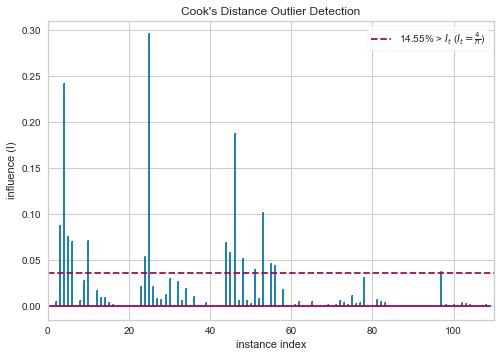

In [12]:
# Instantiate and fit the visualizer
#with ('9/5/2018', 'HR 9'),('9/6/2018', 'HR 8'),('9/8/2018', 'HR 19'),('9/8/2018', 'HR 22') dropping
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

In [13]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
#model.pvalues

In [14]:
from statsmodels.formula.api import ols
infl = model.get_influence()
sm_fr = infl.summary_frame()
sm_fr

dfb_const  dfb_A2501_1HrBf  dfb_A4201_1HrBf  dfb_A4201_2HrBf  \
9/5/2018 HR 4   -0.038994         0.010384        -0.005328         0.006248   
         HR 5    0.160097        -0.036275         0.016871        -0.027654   
         HR 7    0.006355         0.100543        -0.066126        -0.057270   
         HR 8    0.048890         0.138597         0.102669        -0.453571   
         HR 9    0.081309         0.088610        -0.482778         0.680212   
...                   ...              ...              ...              ...   
9/9/2018 HR 20  -0.016966         0.035476        -0.027856        -0.010519   
         HR 21  -0.017687         0.035264        -0.029068        -0.005443   
         HR 22  -0.003169         0.002585         0.000130        -0.004692   
         HR 23  -0.089471         0.059579        -0.024902        -0.038197   
         HR 24   0.020258        -0.006900        -0.002507         0.011561   

                 cooks_d  standard_resid  hat_diag  dffits_internal  \
9/5/2018 HR 4   0.000387       -0.223017  0.030220        -0.039369   
         HR 5   0.006544        0.924899  0.029692         0.161794   
         HR 7   0.003751        0.334068  0.118505         0.122488   
         HR 8   0.065333        1.854118  0.070648         0.511208   
         HR 9   0.180870       -2.583950  0.097764        -0.850576   
...                  ...             ...       ...              ...   
9/9/2018 HR 20  0.000507       -0.250119  0.031408        -0.045040   
         HR 21  0.000404       -0.182936  0.046085        -0.040209   
         HR 22  0.000012       -0.042030  0.025934        -0.006858   
         HR 23  0.003301       -0.809876  0.019737        -0.114917   
         HR 24  0.000167        0.160016  0.025354         0.025808   

                student_resid    dffits  
9/5/2018 HR 4       -0.222015 -0.039192  
         HR 5        0.924263  0.161682  
         HR 7        0.332664  0.121973  
         HR 8        1.876024  0.517248  
         HR 9       -2.656766 -0.874546  
...                       ...       ...  
9/9/2018 HR 20      -0.249010 -0.044840  
         HR 21      -0.182100 -0.040025  
         HR 22      -0.041831 -0.006826  
         HR 23      -0.808552 -0.114729  
         HR 24       0.159279  0.025689  

[110 rows x 10 columns]

In [15]:
sm_fr.to_excel("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/" + "7CD" + Sensor + ".xlsx")

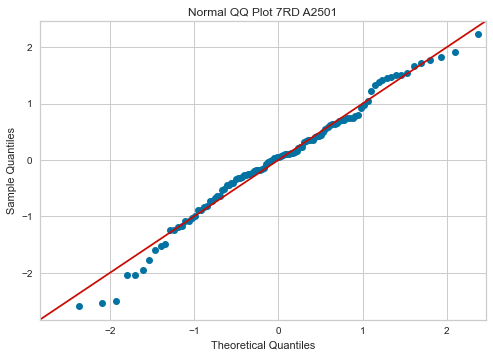

In [16]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
result = model.fit()
res = result.resid
fig = sm.qqplot(res,fit=True,line ='45')
#probplot = sm.ProbPlot(res)
# fig = probplot.qqplot()
h = plt.title('Normal QQ Plot 7RD ' +Sensor)
plt.savefig("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Informs_result/" + Sensor+'_qqplot.png',transparent = True, dpi= 1000, bbox_inches ='tight')
plt.show()

In [17]:
res
res.to_excel("C:/Users/shmhatre/Desktop/Spring_2020/CATM project_2020/TrafficEvacAnalysis/Sensor_Analysis/" + "7res" + Sensor + ".xlsx")

In [18]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
#seed(1)
# generate univariate observations
data = res
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.984, p=0.194
Sample looks Gaussian (fail to reject H0)


In [19]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
#seed(1)
# generate univariate observations
data = res
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1.949, p=0.377
Sample looks Gaussian (fail to reject H0)


In [20]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = res
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.497
15.000: 0.557, data looks normal (fail to reject H0)
10.000: 0.634, data looks normal (fail to reject H0)
5.000: 0.761, data looks normal (fail to reject H0)
2.500: 0.888, data looks normal (fail to reject H0)
1.000: 1.056, data looks normal (fail to reject H0)
